In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
import pyflow
from pyflow.euler.supersonic_inlet import SupersonicInletProblem

# Supersonic Inlet Problem

## Description

Using the quasi-1D Euler equations, calculate the flow within the supersonic inlet for a supersonic ramjet represented schematic below (not drawn to scale). Assume the height of the entrance and exit areas are the same and equal to 0.2 m, and the distance between 

<img src="scramjet.png" alt="Scramjet Schematic"/>

Consider a simplification of the above supersonic inlet. At the left boundary of the boxed-domain, the inflow Mach number is defined as M=2.5 with a free-stream pressure and temperature are given as $p= 1 \times 10^6$ N/m$^2$ and $T= 300$ K, respectively. Thus, the flow is supersonic at the inflow. At the right boundary of the boxed-domain, the exit pressure is specified as $P_{\textrm{exit}}$, and it is unknown \textit{a priori} whether or not the outflow is supersonic or subsonic.

The inlet is symmetric and defined by a two straight lines inclined at the angle $\theta$ given by $\tan \theta = 0.25$ with the intersection rounded using a radius of curvature, $R_c = 0.5$. 

<img src="inlet.png" alt="Scramjet Schematic"/>

Defining the lenght of the domain as $L = 1.0$ m and assuming the spacing between the 81 mesh points is uniform, we can find an equation for the variation of the height, $A(x_i)$, as function the $x_i$ location of each mesh point using the getometrical values $\theta$ and $R_c$. 

## Quasi-One-dimensional Euler Equations

The quasi-1-D, unsteady Euler equations are given by the hyperbolic set of partial differential equations described by

$$
\frac{\partial \, \mathbf{Q}}{\partial t} + \frac{1}{A} \frac{\partial \, \big( \mathbf{F} A \big)}{\partial x} = \mathbf{S}
$$
where $\mathbf{Q}$ is defined as vector of conservative variables

$$
\mathbf{Q} = \begin{bmatrix}
    \rho & \\
    \rho u & \\
    e 
  \end{bmatrix}
$$ 

and the flux vector $\mathbf{F}$ is defined as

$$
\mathbf{F} = \begin{bmatrix}
    \rho u & \\
    \rho u^2 + p & \\
    (e + p) u 
  \end{bmatrix}
$$
and the source term vector is defined as

$$
\mathbf{S} = \begin{bmatrix}
    0 & \\
    \frac{p}{A}\frac{ \partial A }{\partial x} & \\
    0 
  \end{bmatrix}
$$

and $A = A(x)$ is the area of the cross-sectional area as a function of $x$ normalized by the in-plane distance, i.e., the dimensions of A is in meters, not square-meters. For a calorically, perfect gas, we can use the thermodynamic relationship

$$
p = (\gamma - 1) \rho \epsilon
$$
and

$$
\epsilon = c_v T = \frac{e}{\rho} - \frac{1}{2} u^2
$$
to relate the conservative variables to the primitive variables of velocity, pressure, and internal energy. Note that this equation devolves the purely one-dimensional form of the Euler equations when $A(x) = 1$.

## Case 1 : No Shock Wave

First consider the case where the flow remains supersonic through the entire inlet. For the initial conditions

$$
\begin{align}
&M_0 = 2.5 \\
&p_0 = 1 \times 10^6 \, \textrm{N} / \textrm{m}^2 \\
&T_0 = 300 \, \textrm{K},
\end{align}
$$

the isentropic relations can be used to find the variation of the Mach number through the inlet. If there is no shock in the downstream flow, then the isentropic relationships should provide the exact solution and the numerical solution should not vary in time (the initial conditions are the solution). This will provide a verification that the boundary conditions were implemented correctly.

For the case of supersonic flow through the inlet, the variation of density, velocity, and pressure as a function of the area. From the isentropic relations, the pressure, density, and velocity can be determined analytically. This requires using Netwon's method to solve the following equation for Mach number given the known variation in the area.

$$
f(M) = \left(\frac{A}{A_0}\right)^2 - \left(\frac{M_0}{M}\right)^2 \left( \frac{ 1 + \frac{\gamma - 1}{2} M^2 }{ 1 + \frac{\gamma - 1}{2} M_0^2 } \right)^{\frac{\gamma + 1}{\gamma - 1}}
$$

Once the Mach number is computed, isentropic relationships can be used to find the density, pressure, and velocity through the inlets as

$$
\begin{align}
&\frac{\rho}{\rho_0} = \left( \frac{ 1 + \frac{\gamma -1 }{2} M_0^2 } { 1 + \frac{\gamma -1 }{2} M^2 } \right)^{\frac{1}{\gamma - 1}} \\
&\frac{p}{p_0} = \left( \frac{ 1 + \frac{\gamma -1 }{2} M_0^2 } { 1 + \frac{\gamma -1 }{2} M^2 } \right)^{\frac{\gamma}{\gamma - 1}} \\
&u  = \frac{\rho_0 A_0}{\rho A} u_0
\end{align} 
$$

Using a CFL of 0.8, we can take a large number of time steps to verify that the solution does not change. Even if you are not verifying your own implementation of a code, test cases like this are excellent ways to verify that you using the CFD software correctly and that the numerical method is doing what you expect it to do. 

In [4]:
# Final time of 0.02 seconds -- for this problem the initial conditions are
# exact solution, so time should not matter.
#
t_final = 0.02 

# Mesh size
#
Nx = 200

# CFL number
#
CFL = 0.5

In [5]:
# MacCormack method requires numerical dissipation for stabilization
#
MC_inlet = SupersonicInletProblem(method='maccormack', dissipation=0.2, Nx=Nx, CFL=CFL, normalize_solution=True)
MC = MC_inlet.solve(t_final)

2022-05-07 05:09:54,119 | pyflow.euler.supersonic_inlet | INFO | Finite-volume method selected: MacCormack predictor-correct


Simulation Complete
Final time = 0.02
Total number of iterations = 9724
2022-05-07 05:09:55,970 | pyflow.euler.supersonic_inlet | INFO | Returned solution variable speed is the Mach number


In [6]:
# Steger-Warming
#
SW_inlet = SupersonicInletProblem(method='steger-warming', Nx=Nx, CFL=CFL, normalize_solution=True)
SW = SW_inlet.solve(t_final)

2022-05-07 05:10:01,486 | pyflow.euler.supersonic_inlet | INFO | Finite-volume method selected: Steger-Warming


Simulation Complete
Final time = 0.02
Total number of iterations = 9723
2022-05-07 05:10:02,905 | pyflow.euler.supersonic_inlet | INFO | Returned solution variable speed is the Mach number


<IPython.core.display.Javascript object>


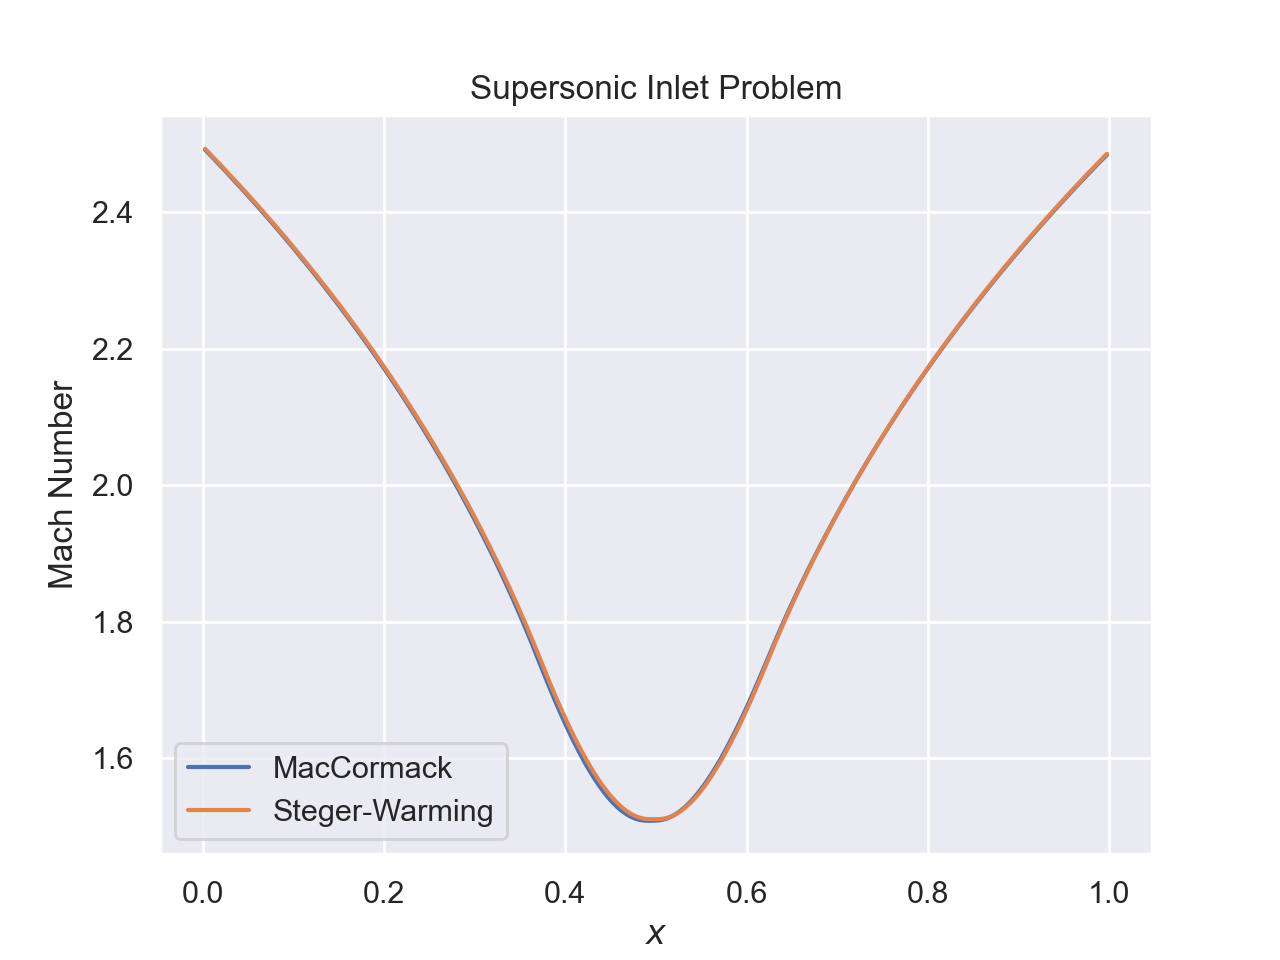

Text(0.5, 1.0, 'Supersonic Inlet Problem')

In [7]:
fig, ax = plt.subplots()
ax.plot(MC.x, MC.speed, label='MacCormack')
ax.plot(SW.x, SW.speed, label='Steger-Warming')

ax.set_xlabel(r'$x$')
ax.set_ylabel('Mach Number')
ax.legend()
plt.title('Supersonic Inlet Problem')

## Case 2 : Stationary Shock Wave

By increasing the back pressure at the outflow boundary, a stationary shock will form in the diverging portion of the inlet. What is the solution for the following conditions?

$$
\begin{align}
&M_0 = 2.5 \\
&p_0 = 1 \times 10^6 \, \textrm{N} / \textrm{m}^2 \\
&T_0 = 300 \, \textrm{K} \\
&p_{exit} = 15 * p_0
\end{align}
$$



In [8]:
# MacCormack method requires numerical dissipation for stabilization
#
MC_inlet_15 = SupersonicInletProblem(method='maccormack', dissipation=0.2, Nx=Nx, CFL=CFL, pExit_p0=15, normalize_solution=True)
MC_15 = MC_inlet_15.solve(t_final)

2022-05-07 05:10:18,185 | pyflow.euler.supersonic_inlet | INFO | Finite-volume method selected: MacCormack predictor-correct


Simulation Complete
Final time = 0.02
Total number of iterations = 9724
2022-05-07 05:10:20,018 | pyflow.euler.supersonic_inlet | INFO | Returned solution variable speed is the Mach number


In [9]:
# Steger-Warming
#
SW_inlet_15 = SupersonicInletProblem(method='maccormack', dissipation=0.2, Nx=Nx, CFL=CFL, pExit_p0=15, normalize_solution=True)
SW_15 = SW_inlet_15.solve(t_final)

2022-05-07 05:10:23,157 | pyflow.euler.supersonic_inlet | INFO | Finite-volume method selected: MacCormack predictor-correct


Simulation Complete
Final time = 0.02
Total number of iterations = 9724
2022-05-07 05:10:25,004 | pyflow.euler.supersonic_inlet | INFO | Returned solution variable speed is the Mach number


<IPython.core.display.Javascript object>


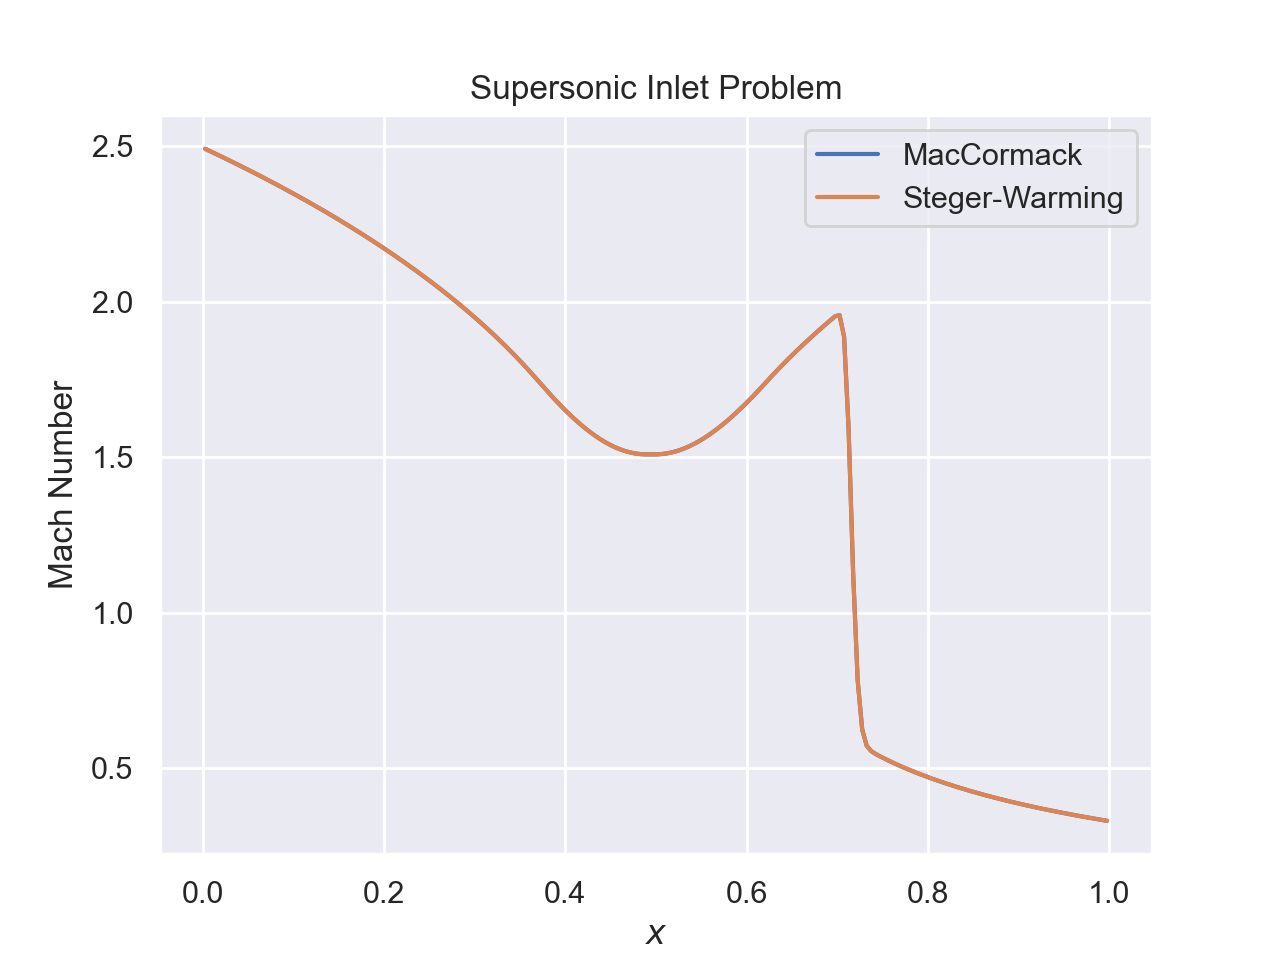

Text(0.5, 1.0, 'Supersonic Inlet Problem')

In [11]:
fig, ax = plt.subplots()
ax.plot(MC_15.x, MC_15.speed, label='MacCormack')
ax.plot(SW_15.x, SW_15.speed, label='Steger-Warming')

ax.set_xlabel(r'$x$')
ax.set_ylabel('Mach Number')
ax.legend()
plt.title('Supersonic Inlet Problem')